# <font color='black'>**Comments & Metadata EDA**</font>

---

## Imports and Reading In Data

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('../csv/comments_metadata_sentiment.csv')

## Basic Info

---

In [5]:
print('{} {}'.format('Rows:', len(df)))
print('{} {}\n'.format('Columns:', len(df.columns)))
print('{} {}\n'.format('Column Names:', list(df.columns)))
print('{} {}\n'.format('Unique Schools:', len(set(df.dbn))))

Rows: 22662
Columns: 30

Column Names: ['dbn', 'username', 'borough', 'grade_level', 'enrollment', 'comment', 'likes', 'dislikes', 'replies', 'fam_comm_ties', 'pct_ell', 'pct_disabilities', 'pct_self_contained', 'economic_need_index', 'pct_temp_housing', 'pct_hra_eligible', 'pct_asian', 'pct_black', 'pct_hispanic', 'pct_white', 'pct_chronic_absent', 'post_year', 'post_month', 'post_day', 'post_hour', 'pos', 'neg', 'neu', 'compound', 'compound_binary']

Unique Schools: 993



---

## Likes 

---

**GENERAL INFO:**

In [6]:
print('{}\n{} {}\n{} {}\n{} {}'.format('---'*10, 'Comments w/ Likes > 0:', len(df[df['likes'] > 0]), 'Percent Comments w/ Likes:', round(len(df[df['likes'] > 0])/len(df), 3), 'Total Likes:', df['likes'].sum()))
print('{}\n{}\n\n{}\n{}'.format('---'*10, 'Summary Statistics', df['likes'].describe(), '---'*10))

------------------------------
Comments w/ Likes > 0: 6363
Percent Comments w/ Likes: 0.281
Total Likes: 18402
------------------------------
Summary Statistics

count    22662.000000
mean         0.812020
std          2.951121
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        103.000000
Name: likes, dtype: float64
------------------------------


**GENERAL DISTRIBUTION:** <br><br>
A quick look at the boxplot shows us that the majority of the data lies in a very low range with a substantial number of outliers.

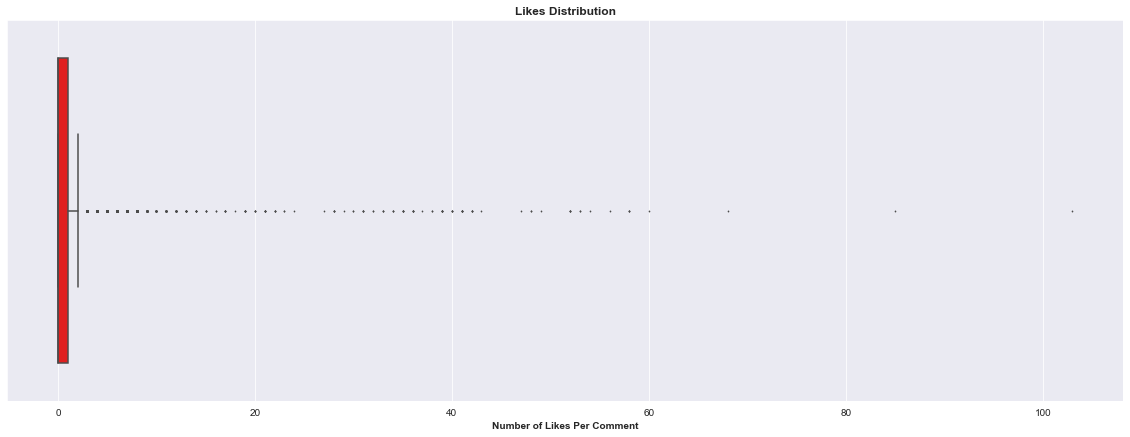

In [53]:
plt.figure(figsize=(20,7))
sns.set_style('darkgrid')
sns.boxplot(df['likes'], fliersize=.9, color='red')
plt.title('Likes Distribution', fontweight='bold')
plt.xlabel('Number of Likes Per Comment', fontweight='bold')
plt.show()

**RANGE OF <= 10:**

With this range in the distribution we can see that there is a strong positive skew with the large majority of comments not containing any likes. Most comments that do contain likes are in the 1-2 range.

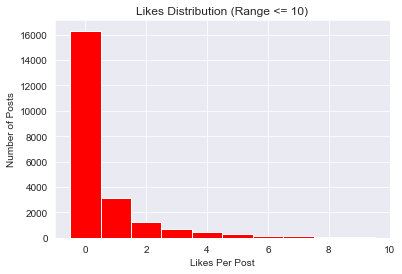

------------------------------
NUMBER OF LIKES:

0 Likes:16299
1 Likes:3111
2 Likes:1252
3 Likes:685
4 Likes:442
5 Likes:263
------------------------------


In [8]:
sns.set_style('darkgrid')
plt.hist(df[df['likes'] <= 10]['likes'], histtype='bar', align='left', color='red')
plt.title('Likes Distribution (Range <= 10)')
plt.xlabel('Likes Per Post')
plt.ylabel('Number of Posts')
plt.show()

# Raw counts for likes up to 5
print('{}\n{}\n'.format('---'*10,'NUMBER OF LIKES:'))
print('{}{}\n{}{}\n{}{}\n{}{}\n{}{}\n{}{}'.format(
    '0 Likes:', (df['likes'] == 0).sum(),
    '1 Likes:', (df['likes'] == 1).sum(),
    '2 Likes:', (df['likes'] == 2).sum(),
    '3 Likes:', (df['likes'] == 3).sum(),
    '4 Likes:', (df['likes'] == 4).sum(),
    '5 Likes:', (df['likes'] == 5).sum()
))
print('---'*10)

---

## Replies

---

**GENERAL INFO:**

In [9]:
print('{}\n{} {}\n{} {}\n{} {}'.format('---'*10, 'Comments w/ Replies > 0:', len(df[df['replies'] > 0]), 'Percent Comments w/ Replies:', round(len(df[df['replies'] > 0])/len(df), 3), 'Total Replies:', df['replies'].sum()))
print('{}\n{}\n\n{}\n{}'.format('---'*10, 'Summary Statistics', df['replies'].describe(), '---'*10))

------------------------------
Comments w/ Replies > 0: 4375
Percent Comments w/ Replies: 0.193
Total Replies: 6428
------------------------------
Summary Statistics

count    22662.000000
mean         0.283647
std          0.739748
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         16.000000
Name: replies, dtype: float64
------------------------------


**BOXPLOT:** <br><br>
A quick look at the boxplot shows us that the majority of the data lies in a very low range with a substantial number of outliers. Looking at the value counts we can show that all non-zero values account for less than a quarter of the data (23.91%). This indicates that most users are not engaging in conversation on the discussion board and are instead making single posts.

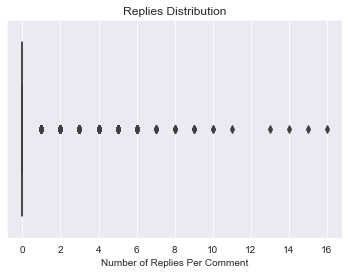

------------------------------
Value Counts:

0     18287
1      3166
2       772
3       253
4        84
5        55
6        21
7         7
8         6
9         4
10        2
15        1
14        1
13        1
11        1
16        1
Name: replies, dtype: int64
------------------------------
Percent of Non-Zero Replies: 0.23916252118296616
 ------------------------------


In [10]:
sns.boxplot(df['replies'])
plt.title('Replies Distribution')
plt.title('Replies Distribution')
plt.xlabel('Number of Replies Per Comment')
plt.show()
print('{}\n{}\n\n{}\n{}\n{} {}\n'.format('---'*10, 'Value Counts:', df['replies'].value_counts(), '---'*10, 'Percent of Non-Zero Replies:', df['replies'].value_counts()[1:].sum()/18293), '---'*10)

---

## Users

---

**Users**

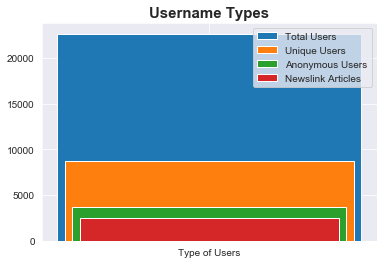

In [11]:
anon = len(df[df['username'] == 'anonymous']) + len(df[df['username'] == 'Anonymous'])
newslink = len(df[df['username'] == 'newslink']) + len(df[df['username'] == 'Newslink'])
unique_users = len(set(df['username']))
total_users = len(df['username'])

plt.title('Username Types', fontweight='bold', fontsize=15)
plt.bar(['Type of Users'], total_users, width = 1)
plt.bar(['Type of Users'], unique_users, width = .95)
plt.bar(['Type of Users'], newslink, width=.9)
plt.bar(['Type of Users'], anon, width=.85)
plt.legend(['Total Users', 'Unique Users', 'Anonymous Users', 'Newslink Articles'])
plt.show()

In [12]:
print('{} {}'.format('Total Users:', len(df['username'])))
print('{} {}'.format('Anonymous Users:', len(df[df['username'] == 'anonymous']) + len(df[df['username'] == 'Anonymous']))) 
print('{} {}'.format('Anonymous Users:', len(df[df['username'] == 'newslink']) + len(df[df['username'] == 'Newslink']))) 

Total Users: 22662
Anonymous Users: 2522
Anonymous Users: 3748


**Unique Users By Borough** <br><br>
By comparing the unique users by borough with unique schools by borough we can see that Manhattan has a more active users given the number of schools while the Bronx and Staten Island have noticeably less active users given the number of schools.


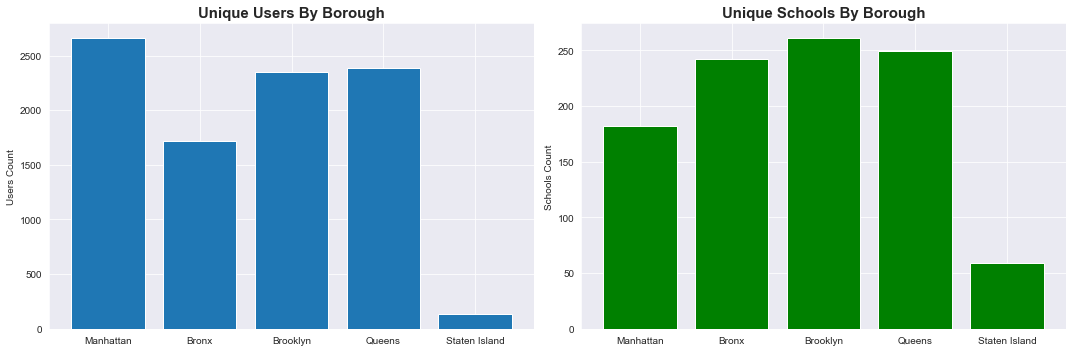

------------------------------
UNIQUE USERS COUNTS

Unique Users: 8763
Unique Users Manhattan: 2661
Unique Users Bronx: 1714
Unique Users Brooklyn: 2351
Unique Users Queens: 2386
Unique Users Staten Island: 135
------------------------------


In [13]:
# graphing data
borough_unique_users = [len(set(df[df['borough'] == 'manhattan'].username)), len(set(df[df['borough'] == 'bronx'].username)), len(set(df[df['borough'] == 'brooklyn'].username)), len(set(df[df['borough'] == 'queens'].username)), len(set(df[df['borough'] == 'staten_island'].username))]
dbn_per_borough = [len(set(df[df['borough'] == 'manhattan']['dbn'])), len(set(df[df['borough'] == 'bronx']['dbn'])), len(set(df[df['borough'] == 'brooklyn']['dbn'])), len(set(df[df['borough'] == 'queens']['dbn'])), len(set(df[df['borough'] == 'staten_island']['dbn']))]
borough_names = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']

# plot 1
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(borough_names, borough_unique_users)
plt.title('Unique Users By Borough', fontsize=15, fontweight='bold')
plt.ylabel('Users Count')

# plot 2
plt.subplot(1,2,2)
plt.bar(borough_names, dbn_per_borough, color='green')
plt.title('Unique Schools By Borough', fontsize=15, fontweight='bold')
plt.ylabel('Schools Count')
plt.tight_layout()
plt.show()

# unique user counts
print('{}\n{}\n\n{} {}\n{} {}\n{} {}\n{} {}\n{} {}\n{} {}\n{}'.format('---'*10, 'UNIQUE USERS COUNTS','Unique Users:', len(set(df.username)), 'Unique Users Manhattan:', len(set(df[df['borough'] == 'manhattan'].username)), 'Unique Users Bronx:', len(set(df[df['borough'] == 'bronx'].username)), 'Unique Users Brooklyn:', len(set(df[df['borough'] == 'brooklyn'].username)), 'Unique Users Queens:', len(set(df[df['borough'] == 'queens'].username)), 'Unique Users Staten Island:', len(set(df[df['borough'] == 'staten_island'].username)), '---'*10))

**Unique Users By Grade**

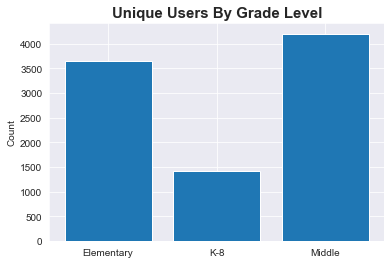

In [14]:
grade_users_count = [len(set(df[df['grade_level'] == 'Elementary'].username)),len(set(df[df['grade_level'] == 'K-8'].username)),len(set(df[df['grade_level'] == 'Middle'].username))]
plt.bar(df.grade_level.unique(), grade_users_count)
plt.ylabel('Count')
plt.title('Unique Users By Grade Level', fontweight='bold', fontsize=15)
plt.show()

**DUPLICATE USERS (MORE THAN ONE POST)**

insideschools.org appears to allow multiple users to use the same username. For example the "school staff" has at least one comment across every borough in NYC and the "Concerned Parent" username has posts that stretch from 2011 to 2019 and cover every borough besides Long Island. While this user activity is possible, as a parent could have multiple children in different areas of NYC over the span of 8 years, it seems more likely given the trend from other usernames that these accounts are used by multiple people. There are also organization accounts like "newslink", which posts articles (both good and bad) about the given school to the discussion board for that school, or "Wellness In The Schools", which is a physical education program. Taking these factors into consideration we can see that the max posts from a general user is 29, given by "jupiter1991".

In [15]:
df.username.value_counts()[:20]

newslink                   3672
Anonymous                  2432
parent                      473
Insideschools               259
Guest                       245
other                       180
student                     172
Parent                      160
Student                      96
guest                        94
anonymous                    90
Newslink                     76
alumnus                      68
school staff                 58
Anon                         37
Concerned Parent             33
jupiter1991                  29
Anonymous                    27
Sophie                       22
Wellness In The Schools      22
Name: username, dtype: int64

The box plot below shows us that the majority of users are only posting 1 comment. Even as little as 4 comments is considered an outier lending to the fact that user engagement and conversations with other users is low. 

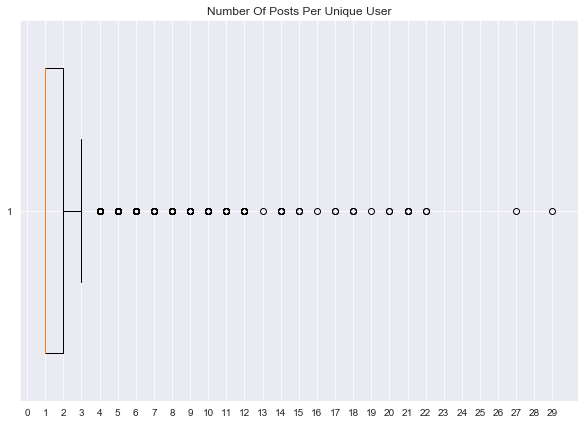

In [16]:
dup = df.username.value_counts()[16:].tolist()

plt.figure(figsize=(10,7))
plt.boxplot(dup, vert=False, widths=.75)
plt.title('Number Of Posts Per Unique User')
plt.xticks(np.arange(0,30,step=1))
plt.show()

In [17]:
# df[df['username'] == 'jupiter1991']

**Unique Users By Enrollment**

In [18]:
# # Create a dictionary of DBN and Usernames
# dbn_username_dict = dict(zip(df['dbn'], df['username']))

In [19]:
# set(df['username'])

In [20]:
# for x in list(set(df['dbn']))

In [21]:
# dbn_enroll_dict = dict(zip(df['dbn'], df['enrollment']))

In [22]:
# dbn_enroll_dict

In [23]:
# len(dbn_enroll_dict)

In [24]:
# df['enrollment']))

In [25]:
# enrollment = []

# for x in set(df['username']):
#     for y in df['username']:
#         for z in df['enrollment']
#         if x == y:
#             enrollment.append(x)

In [26]:
# enrollment

**Unique users in % white/black/hispanic/asian schools**

## Comments

**ENGINEERING FEATURES**

In [27]:
df['num_words'] = [len(x.split(' ')) for x in df.comment]
df['num_characters'] = [len(x) for x in df.comment]

In [28]:
# # get number of words and characters for each comment
# num_words = []
# num_characters = []

# for x in df.comment:
#     num_words.append(len(x.str.split(' ')))
#     num_characters.append(len(x))

In [29]:
# # add info to dataframe
# df['num_words'] = num_words
# df['num_characters'] = num_characters

**GENERAL INFO**

In [30]:
print('{}\n{}\n\n{} {}\n{} {}\n{} {}\n{} {}\n{} {}\n{} {}'.format('---'*10, 'GENERAL COMMENT INFO', 'Max Words:', df.num_words.max(), 'Min Words:', df.num_words.min(), 'Mean Words:', df.num_words.mean(), 'Max Characters:', df.num_characters.max(), 'Min Characters:', df.num_characters.min(), 'Mean Characters:', df.num_characters.mean()))
print('{}\n{}\n\n{}\n{}'.format('---'*10, 'SUMMARY STATISTICS: NUM COMMENTS PER SCHOOL', df.dbn.value_counts().describe(), '---'*10))

------------------------------
GENERAL COMMENT INFO

Max Words: 2013
Min Words: 1
Mean Words: 71.92714676551054
Max Characters: 12422
Min Characters: 1
Mean Characters: 405.5592622010414
------------------------------
SUMMARY STATISTICS: NUM COMMENTS PER SCHOOL

count    993.000000
mean      22.821752
std       20.358566
min        1.000000
25%        8.000000
50%       15.000000
75%       32.000000
max      100.000000
Name: dbn, dtype: float64
------------------------------


**COMMENTS DISTRIBUTIONS**

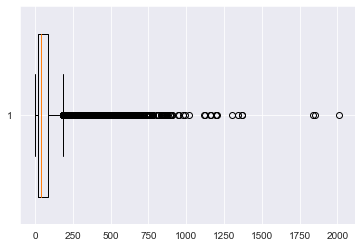

In [31]:
plt.boxplot(df.num_words, vert=False, widths=.75)
plt.show()

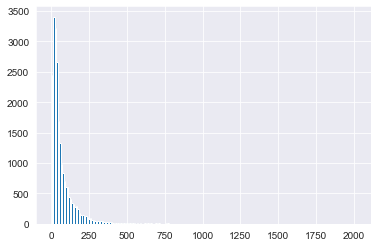

In [32]:
plt.hist(df.num_words, bins=200)
plt.show()

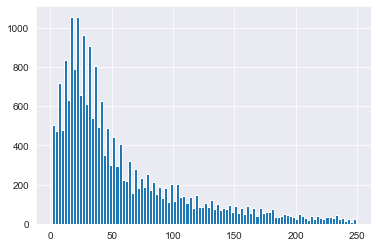

In [33]:
plt.hist(df[df['num_words'] < 250]['num_words'], bins=100)
plt.show()

Short comments around a length of 5 tend to be quick replies. Comments up to around 20 appear to be quick responses to signal whether a school is good or bad. Comments around 30 appear to be full of news articles about each school. Comments 50+ appear to be more detailed accounts of people's experiences for a given school.

In [34]:
# some examples of comments of varying word lengths
print('{}\n{}\n{}'.format('---'*10, '5 Words:', df[df['num_words'] == 5]['comment'].iloc[5]))
print('{}\n{}\n{}'.format('---'*10, '10 Words:', df[df['num_words'] == 10]['comment'].iloc[15]))
print('{}\n{}\n{}'.format('---'*10, '20 Words:', df[df['num_words'] == 20]['comment'].iloc[15]))
print('{}\n{}\n{}'.format('---'*10, '30 Words:', df[df['num_words'] == 30]['comment'].iloc[40]))
print('{}\n{}\n{}'.format('---'*10, '50 Words:', df[df['num_words'] == 50]['comment'].iloc[40]))
print('{}\n{}\n{}'.format('---'*10, '100 Words:', df[df['num_words'] == 100]['comment'].iloc[40]))

------------------------------
5 Words:
Thats me forgot to login
------------------------------
10 Words:
I just read the horrible news about this school. http://nypost.com/2014/10/29/pervy-school-janitor-peeks-on-neighbors-plays-with-his-pickle/
------------------------------
20 Words:
"We were also told the school generally did not treat boys well. - absolutely CRAZY and UNTRUE, a blatant lie
------------------------------
30 Words:
In Debt for Life - your comment is not a constructive one. I'm very impressed with the variety of schools students are attending and the quality of the college advising.
------------------------------
50 Words:
The school is making an effort to increase physical activities for students, but there is only one gym period a week.The phys ed teacher wishes there were more. He is encouraging kids to exercise every day this summer. Read more: <ahref="http://www.nytimes.com/2012/07/11/education/even-as-schools-battle-obesity-physical-education-is-sidelined.html?

**BY DATE**

In [35]:
df.head()

,dbn,username,borough,grade_level,enrollment,comment,likes,dislikes,replies,fam_comm_ties,...,post_month,post_day,post_hour,pos,neg,neu,compound,compound_binary,num_words,num_characters
0,01M015,P.S. 15 Parent,manhattan,Elementary,161,P.S. 15 is an extraordinary small school that ...,0,0,0,1.0,...,5,11,14,0.218,0.01,0.772,0.9973,1.0,322,1922
1,01M015,Houleye Sy,manhattan,Elementary,161,A Hidden Gem!Amazing community school that fee...,0,0,0,1.0,...,4,30,21,0.189,0.00,0.811,0.9761,1.0,123,729
2,01M015,newslink,manhattan,Elementary,161,PS 15 is among the schools with the most impro...,0,0,0,1.0,...,8,31,15,0.166,0.00,0.834,0.5256,1.0,18,92
3,01M015,newslink,manhattan,Elementary,161,PS 15 second graders won a city-wide ferry nam...,0,0,0,1.0,...,4,14,15,0.163,0.00,0.837,0.5719,1.0,20,105
4,01M015,newslink,manhattan,Elementary,161,NYC Department of Education officials barred a...,0,0,0,1.0,...,11,14,21,0.000,0.00,1.000,0.0000,0.0,25,151


In [36]:
# df.to_csv('tableau_comments_metadata.csv', index=False)